In [2]:
import numpy as np
from scipy import sparse as sps
from os import makedirs
from os.path import join, exists
from matplotlib import pyplot as plt, ticker
from scipy.stats import norm
from scipy.optimize import fsolve
import math
import seaborn as sns

(299400, 2, 75)
Length of array is:  299400
Above upper bound tuples: 76810
Below lower bound tuples: 41501
Time taken list to transtion:  [1004, 1991, 1255, 1282, 4853, 2215, 959, 2759, 527, 1784, 117, 1016, 1452, 259, 149, 575, 409, 923, 2286, 1469, 177, 135, 3763, 2133, 3204, 925, 1031, 661, 135, 1827, 269, 318, 575, 1613, 1677, 212, 2975, 1351, 503, 6777, 165, 134, 635, 152, 4359, 3524, 1820, 2970, 111, 5221, 4154, 1387, 2750, 3395, 600, 1143, 294, 4346, 451, 1111, 678, 857, 3532, 2798, 200, 269, 4365, 1019, 2588, 427, 1891, 714, 3885, 2173, 4662, 5014, 11521, 895, 274, 1110]
Time taken list to transtion:  [5109, 399, 4449, 357, 4726, 879, 378, 282, 7698, 1085, 3139, 1173, 2438, 3606, 1629, 822, 1878, 784, 1253, 4508, 3342, 1243, 128, 7306, 7016, 3481, 117, 195, 1233, 3755, 811, 198, 1255, 506, 459, 208, 184, 1674, 1589, 2010, 802, 402, 1576, 1157, 1198, 2425, 1392, 2522, 610, 398, 2768, 447, 413, 2058, 966, 354, 6393, 924, 390, 4859, 1689, 2407, 2578, 3240, 329, 3661, 1914, 2241, 

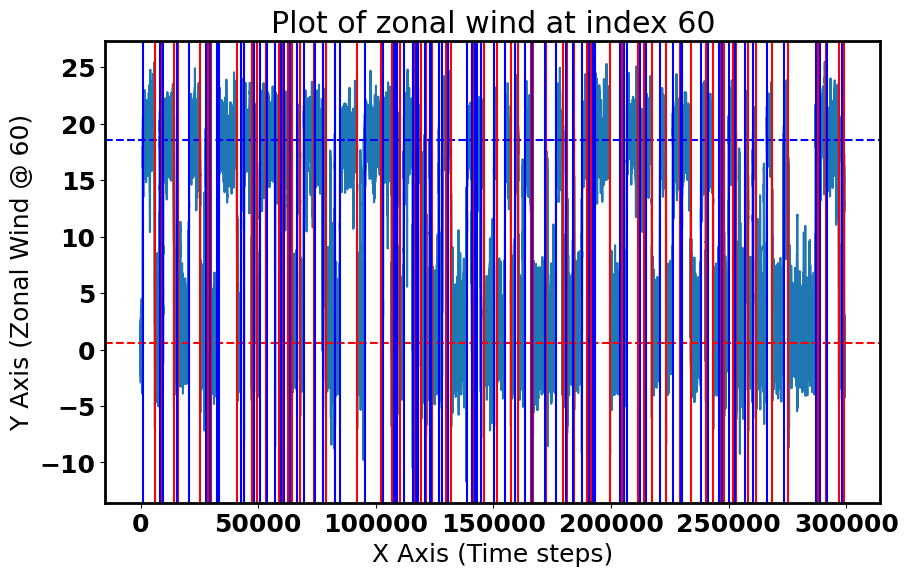

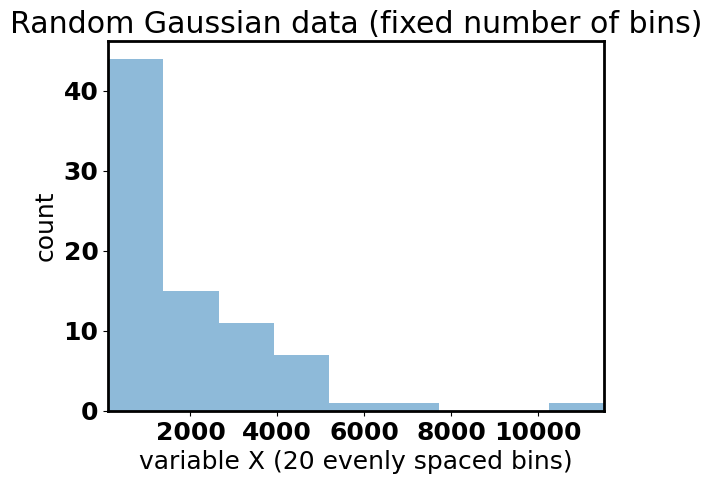

[ 117.          959.33333333 1801.66666667 2644.         3486.33333333
 4328.66666667 5171.         6013.33333333 6855.66666667 7698.        ] 10


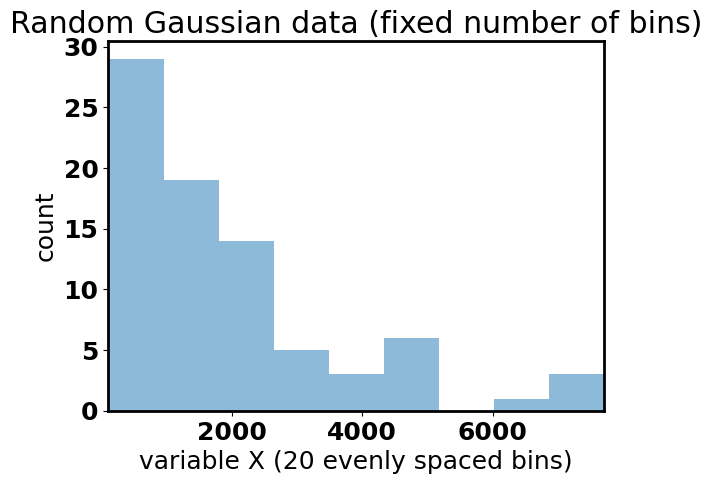

In [3]:


font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 2

#Weights at different epochs, and log log plots
#Scaling influence of the architecture week

# Load the file
file_path = r'/home/constantino-daniel-boscu/Documents/research/AI-RES/modified_code-main2/x_stoch.npy'
data = np.load(file_path)



print(data.shape)
print("Length of array is: ", len(data[:, :, 60]))


upper_bound = 53.8 / 2.8935
lower_bound = 1.75 / 2.8935


left_limit = 0
right_limit = 299400

#Grabbed the 61st element of the zonal wind
y_values = data[left_limit:right_limit, 1, 60]
x_values = np.arange(right_limit - left_limit)

"""Plot for the timeseries"""
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.xlabel('X Axis (Time steps)')
plt.axhline(y = upper_bound, color = 'b', linestyle = '--') 
plt.axhline(y = lower_bound, color = 'r', linestyle = '--') 
plt.ylabel('Y Axis (Zonal Wind @ 60)')
plt.title('Plot of zonal wind at index 60')


above_upper_bound_weak = [(index, y) for index, y in enumerate(y_values) if y > upper_bound]
below_lower_bound_weak = [(index, y) for index, y in enumerate(y_values) if y < lower_bound]

print("Above upper bound tuples:", len(above_upper_bound_weak))
print("Below lower bound tuples:", len(below_lower_bound_weak))


"""Print only the first n elements of the array"""
# upper_limit = 10000
# weak_state_ten = data[:upper_limit, 1, 50:]
# y_values_ten = np.mean(weak_state, axis=1)
# above_upper_bound_weak_ten = [(index, y) for index, y in enumerate(y_values_ten) if y > upper_bound]
# below_lower_bound_weak_ten = [(index, y) for index, y in enumerate(y_values_ten) if y < lower_bound]
"""Code Ends"""



"""Finding Transitions"""
transitions = []
above_upper = False  # Flag to track if we are above upper bound
time_to_transition = []
time_taken = 0
time_to_transition_two = []

transitions_two = []
below_lower = False  # Flag to track if we are below lower bound

time_taken = 0
for i in range(1, len(y_values)):
    time_taken += 1


    if y_values[i] > upper_bound:
        above_upper = True
        

    elif above_upper and y_values[i] < lower_bound:

        time_to_transition_two.append(time_taken)
        transitions.append(i)
        time_taken = 0
        above_upper = False  # Reset flag after transition


    if y_values[i] < lower_bound:
        below_lower = True

    elif below_lower and y_values[i] > upper_bound:
        transitions_two.append(i)


        time_to_transition.append(time_taken)
        time_taken = 0
        below_lower = False  # Reset flag after transition

print("Time taken list to transtion: " , time_to_transition)
print("Time taken list to transtion: " , time_to_transition_two)

print("Number of transitions from below lower to above upper bound:", len(transitions_two))
print("Number of transitions from above upper to below lower bound:", len(transitions))

"""Plot the Vertical Lines"""
for val in transitions:
    plt.axvline(x = val, color = 'r', label = 'axvline - full height')
for val in transitions_two:
    plt.axvline(x = val, color = 'b', label = 'axvline - full height')
plt.show()


""" Histogram code found here """



data = time_to_transition

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   10) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed number of bins)')
plt.xlabel('variable X (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()


data = time_to_transition_two

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   10) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])
print(bins,len(bins))
plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed number of bins)')
plt.xlabel('variable X (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()


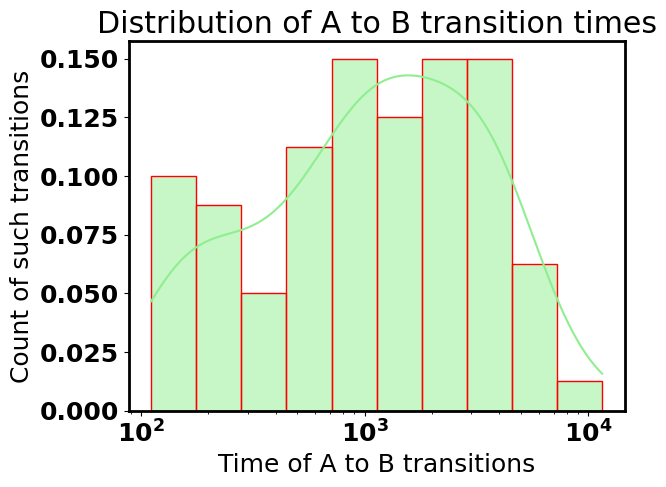

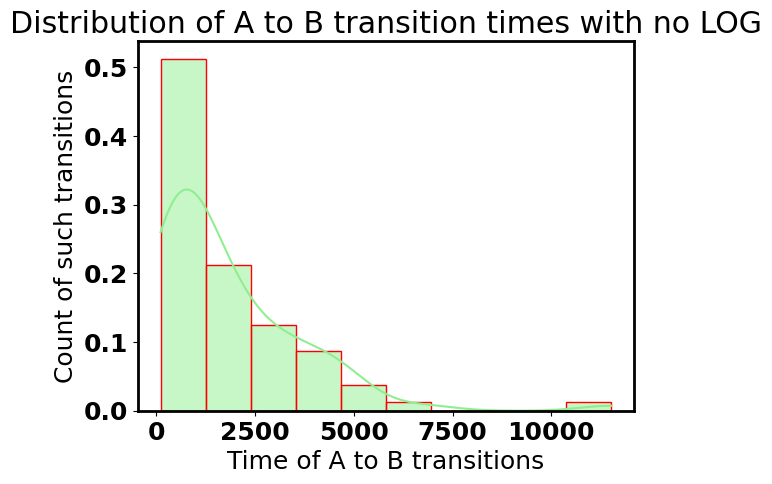

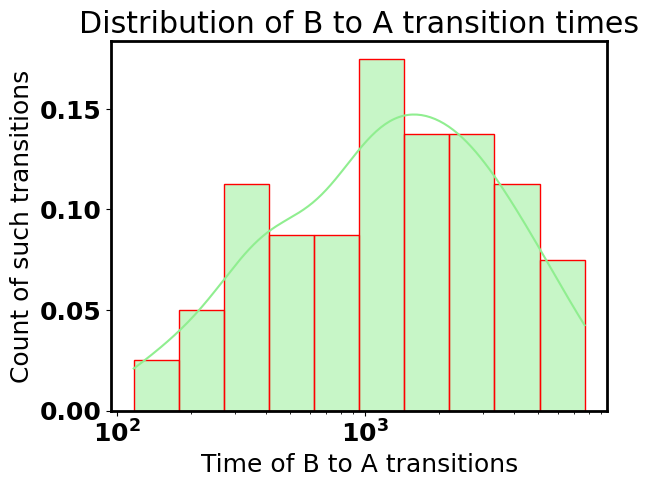

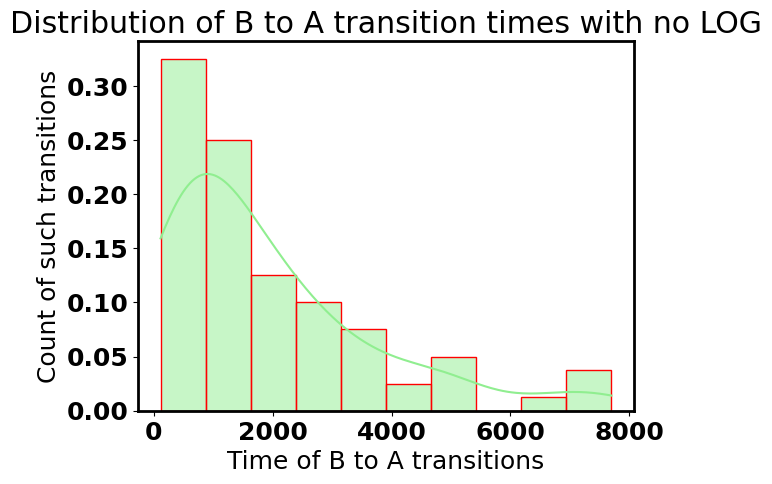

[0.68198205 0.62764489 0.56759611 ... 2.07851923 2.47015647 2.12319704] (299400,)


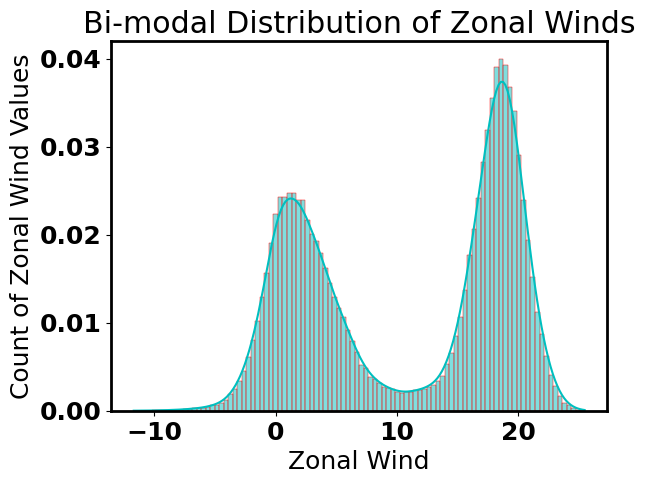

In [4]:
# Daniel's code

import seaborn as sns

A_to_B = time_to_transition

sns.histplot(A_to_B, bins=10, kde=True, color='lightgreen', edgecolor='red', log_scale=10, stat='probability')

plt.title('Distribution of A to B transition times')
plt.xlabel('Time of A to B transitions')
plt.ylabel('Count of such transitions')
plt.show()

A_to_B = time_to_transition

sns.histplot(A_to_B, bins=10, kde=True, color='lightgreen', edgecolor='red', stat='probability')

plt.title('Distribution of A to B transition times with no LOG')
plt.xlabel('Time of A to B transitions')
plt.ylabel('Count of such transitions')
plt.show()

B_to_A = time_to_transition_two

sns.histplot(B_to_A, bins=10, kde=True, color='lightgreen', edgecolor='red', log_scale=10, stat='probability')

plt.title('Distribution of B to A transition times')
plt.xlabel('Time of B to A transitions')
plt.ylabel('Count of such transitions')
plt.show()

B_to_A = time_to_transition_two

sns.histplot(B_to_A, bins=10, kde=True, color='lightgreen', edgecolor='red', stat='probability')

plt.title('Distribution of B to A transition times with no LOG')
plt.xlabel('Time of B to A transitions')
plt.ylabel('Count of such transitions')
plt.show()

file_path = r'/home/constantino-daniel-boscu/Documents/research/AI-RES/modified_code-main2/x_stoch.npy'
data = np.load(file_path)
wind_data = data[:,1,60]
print(wind_data, wind_data.shape)

sns.histplot(wind_data, bins=100, kde=True, color = 'c', edgecolor = 'red', stat='probability')

plt.title('Bi-modal Distribution of Zonal Winds')
plt.xlabel('Zonal Wind')
plt.ylabel('Count of Zonal Wind Values')
plt.show()


In [5]:
# Predicted times

file_path_pred = r'/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/100ep-jan16th-4096batch-1/pred_data.npy'
data_pred = np.load(file_path_pred)
print(data_pred.shape, data_pred)
upper_bound = 53.8 / 2.8935
lower_bound = 1.75 / 2.8935
left_limit = 0
right_limit = 299400
y_values_predicted = data_pred[left_limit:right_limit, 0]

transitions_predicted = []
above_upper = False  # Flag to track if we are above upper bound
time_to_transition_predicted = []
time_taken = 0
time_to_transition_two_predicted = []

transitions_two_predicted = []
below_lower = False  # Flag to track if we are below lower bound

time_taken = 0
for i in range(1, len(y_values_predicted)):
    time_taken += 1


    if y_values_predicted[i] > upper_bound:
        above_upper = True
        

    elif above_upper and y_values_predicted[i] < lower_bound:

        time_to_transition_two_predicted.append(time_taken)
        transitions_predicted.append(i)
        time_taken = 0
        above_upper = False  # Reset flag after transition


    if y_values_predicted[i] < lower_bound:
        below_lower = True

    elif below_lower and y_values_predicted[i] > upper_bound:
        transitions_two_predicted.append(i)


        time_to_transition_predicted.append(time_taken)
        time_taken = 0
        below_lower = False  # Reset flag after transition

print("Time taken list to transtion: " , time_to_transition_predicted)
print("Time taken list to transtion: " , time_to_transition_two_predicted)

print("Number of transitions from below lower to above upper bound:", len(transitions_two_predicted))
print("Number of transitions from above upper to below lower bound:", len(transitions_predicted))



(100000, 1) [[22.0337677 ]
 [22.9338365 ]
 [24.1440917 ]
 ...
 [-3.8384599 ]
 [-4.43542571]
 [-3.82677474]]
Time taken list to transtion:  [6935, 6661, 204, 316, 420, 2968, 6189, 4396, 1943, 5861, 101, 574, 116, 1068, 924, 13351, 6290, 5273, 1040, 9624, 993]
Time taken list to transtion:  [1243, 170, 457, 334, 1094, 638, 1111, 1336, 1646, 68, 749, 2795, 588, 107, 465, 846, 188, 595, 1283, 396, 279, 39]
Number of transitions from below lower to above upper bound: 21
Number of transitions from above upper to below lower bound: 22


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim(0,0.35)

# Actual Time of A to B Transitions

A_to_B = time_to_transition[:21]
print(type(A_to_B[0]))
print(len(A_to_B))

sns.histplot(A_to_B, bins=10, kde=True, color='lightgreen', edgecolor='red', log_scale=10, stat='probability', ax=ax)

plt.title('Distribution of A to B transition times')
plt.xlabel('Time of A to B transitions')
plt.ylabel('Count of such transitions')
plt.savefig("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/plots/transition_time/Distribution_of_A_to_B_transition_times")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim(0,0.35)

# Predicted Time of A to B Transitions

A_to_B_pred = time_to_transition_predicted
print(len(A_to_B_pred))

sns.histplot(A_to_B_pred, bins=8, kde=True, color='lightblue', edgecolor='red', log_scale=10, stat='probability', ax=ax)

plt.title('Distribution of A to B predicted transition times')
plt.xlabel('Time of A to B transitions')
plt.ylabel('Count of such transitions')
plt.savefig("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/plots/transition_time/Distribution_of_A_to_B_predicted_transition_times")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim(0,0.35)

# Actual Time of B to A Transitions

B_to_A = time_to_transition_two

sns.histplot(B_to_A, bins=10, kde=True, color='lightgreen', edgecolor='red', log_scale=10, stat='probability')

plt.title('Distribution of B to A transition times')
plt.xlabel('Time of B to A transitions')
plt.ylabel('Count of such transitions')
plt.savefig("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/plots/transition_time/Distribution_of_B_to_A_transition_times")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim(0,0.35)

# Predicted Time of B to A Transitions

B_to_A_pred = time_to_transition_two_predicted

sns.histplot(B_to_A_pred, bins=10, kde=True, color='lightblue', edgecolor='red', log_scale=10, stat='probability')

plt.title('Distribution of B to A predicted transition times')
plt.xlabel('Time of B to A transitions')
plt.ylabel('Count of such transitions')
plt.savefig("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/plots/transition_time/Distribution_of_B_to_A_predicted_transition_times")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=A_to_B,
            color='lightblue', 
            label='Actual', 
            fill=True,
            ax=ax)
sns.kdeplot(data=A_to_B_pred,
            color='moccasin', 
            label='Predicted', 
            fill=True,
            ax=ax)

ax.legend()
plt.title('Distribution of Actual and Predicted A to B transition times')
plt.xlabel('Time of A to B transitions')
plt.ylabel('Count of such transitions')
plt.savefig("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/plots/transition_time/Distribution_of_A_to_B_transition_times_overlapped")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=B_to_A,
            color='lightblue', 
            label='Actual', 
            fill=True,
            ax=ax)
sns.kdeplot(data=B_to_A_pred,
            color='moccasin', 
            label='Predicted', 
            fill=True,
            ax=ax)

ax.legend()
plt.title('Distribution of Actual and Predicted B to A transition times')
plt.xlabel('Time of A to B transitions')
plt.ylabel('Count of such transitions')
plt.savefig("/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/plots/transition_time/Distribution_of_B_to_A_transition_times_overlapped")
plt.show()

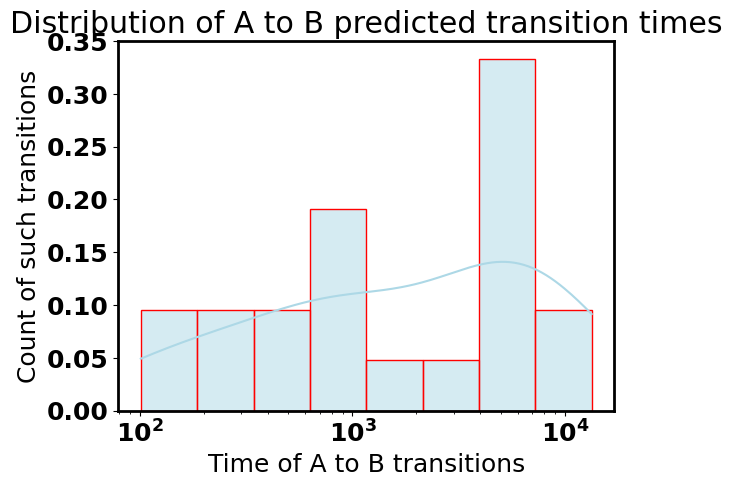

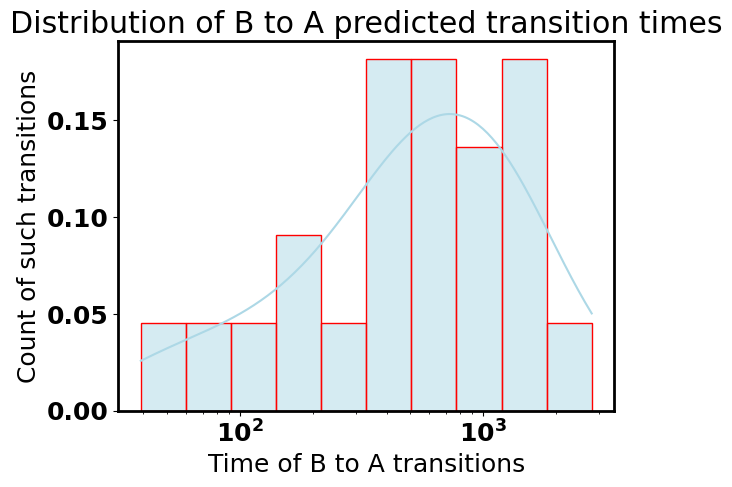

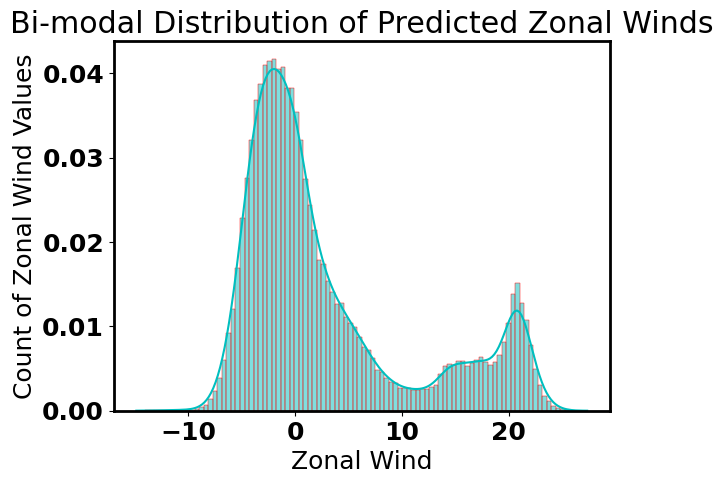

In [ ]:
# Bi-modal Distribution of Predicted Zonal Winds

wind_data_pred = data_pred[:,0]
sns.histplot(wind_data_pred, bins=100, kde=True, color = 'c', edgecolor = 'red', stat='probability')

plt.title('Bi-modal Distribution of Predicted Zonal Winds')
plt.xlabel('Zonal Wind')
plt.ylabel('Count of Zonal Wind Values')
plt.show()


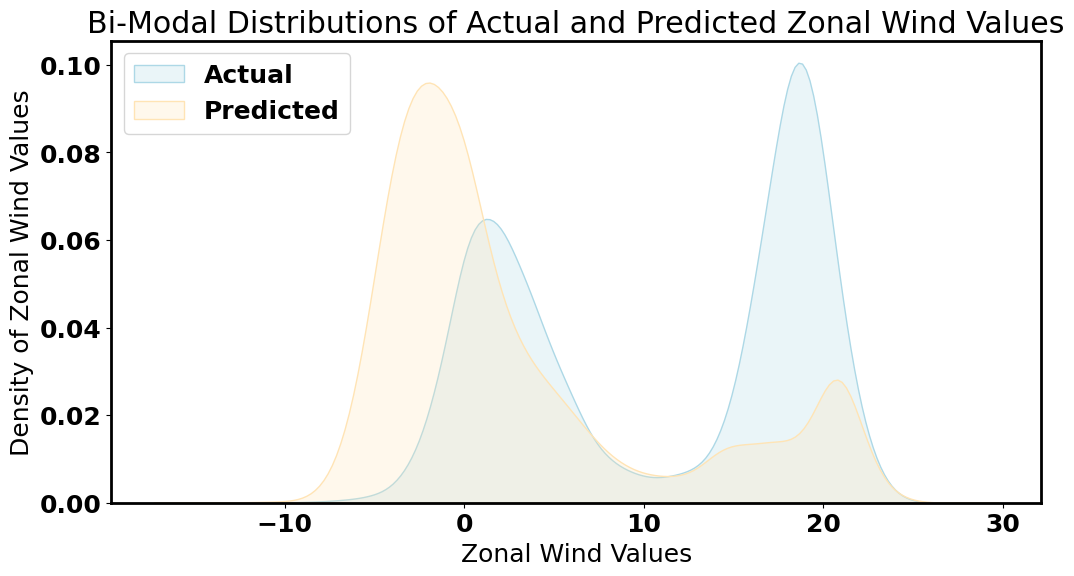

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=wind_data,
            color='lightblue', 
            label='Actual', 
            fill=True,
            ax=ax)
sns.kdeplot(data=wind_data_pred,
            color='moccasin', 
            label='Predicted', 
            fill=True,
            ax=ax)
ax.legend()
plt.ylabel("Density of Zonal Wind Values")
plt.xlabel("Zonal Wind Values")
plt.title("Bi-Modal Distributions of Actual and Predicted Zonal Wind Values")
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


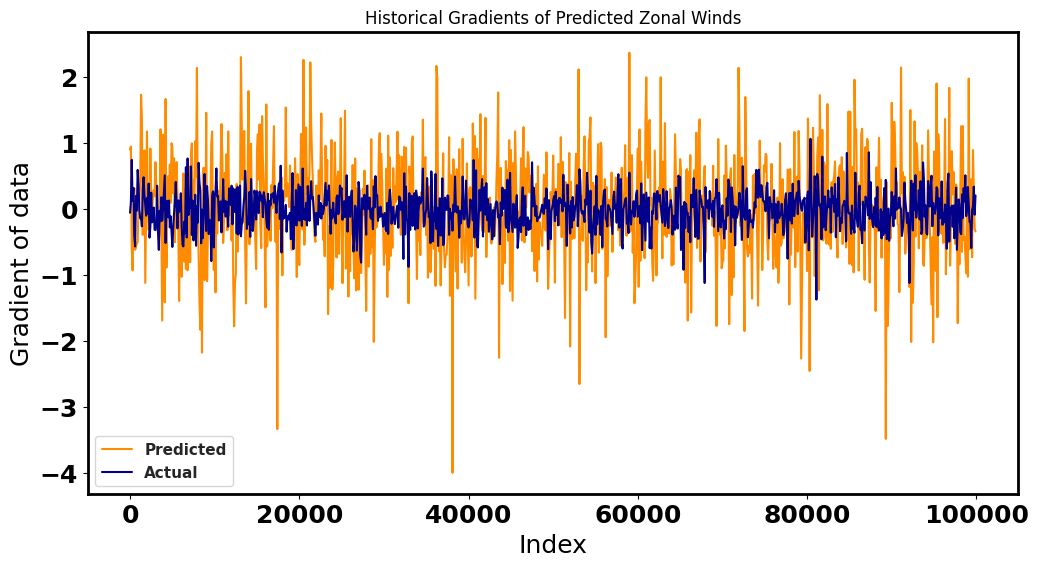

In [8]:
new_grad_data_pred = []
new_grad_data = []
for i in range(1,100000):
    new_grad_data_pred.append(wind_data_pred[i]-wind_data_pred[i-1])
    new_grad_data.append(wind_data[i]-wind_data[i-1])
    print(i)

gradient_data_pred = np.array(new_grad_data_pred)
gradient_data = np.array(new_grad_data)
print(gradient_data.shape, gradient_data_pred.shape)

fig, ax = plt.subplots(figsize=(12, 6))

sns.set_theme(style="whitegrid")
sns.lineplot(x=np.arange(0, len(gradient_data_pred), 100), y=gradient_data_pred[::100], color = "darkorange", label = "Predicted", ax=ax)
sns.lineplot(x=np.arange(0, len(gradient_data), 100), y=gradient_data[::100], color = "darkblue", label = "Actual", ax=ax)

plt.title('Historical Gradients of Predicted Zonal Winds')
plt.xlabel('Index')
plt.ylabel('Gradient of data')
plt.show()

<class 'int'>
21


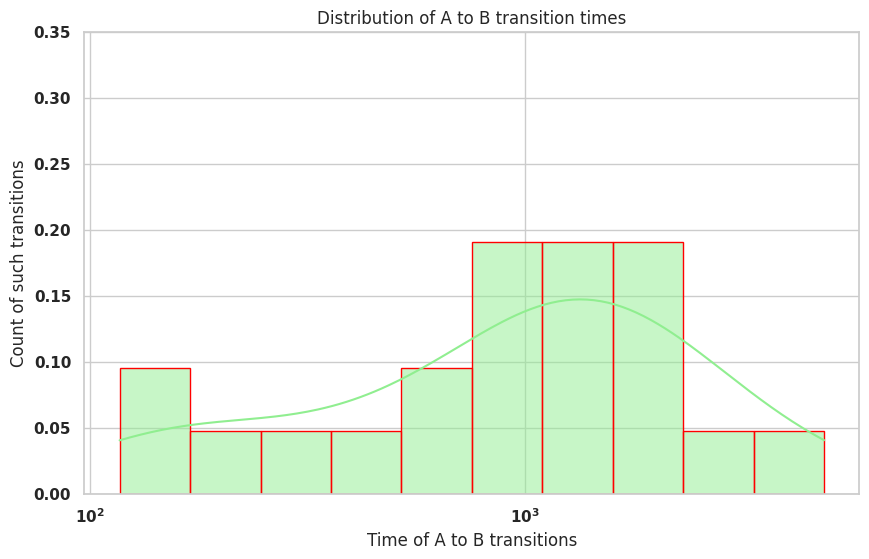

21


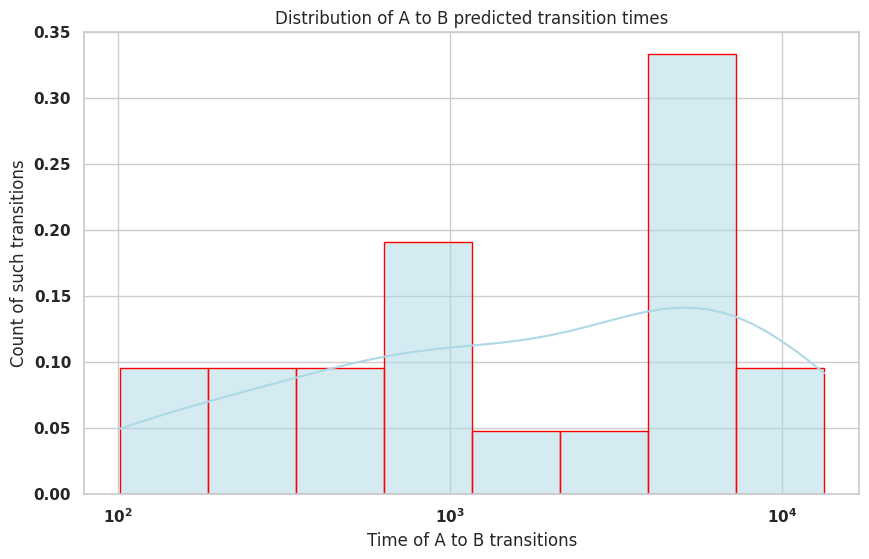

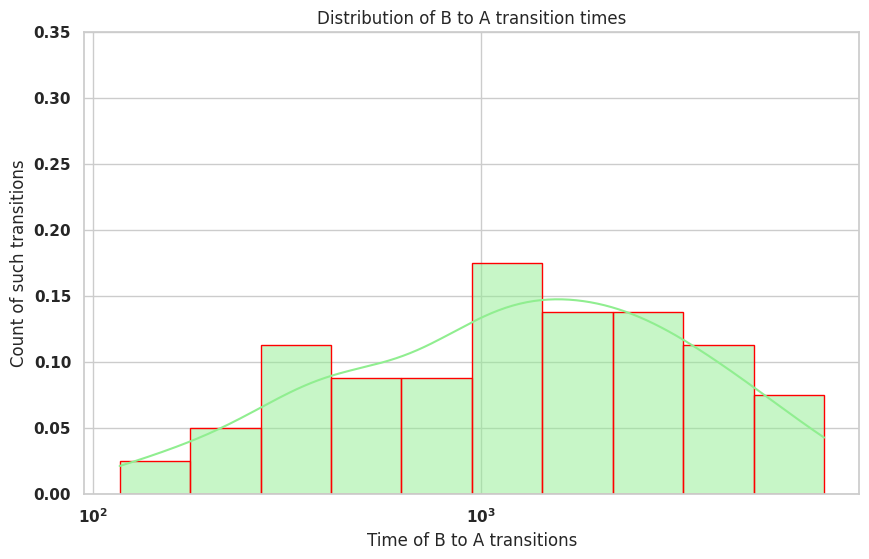

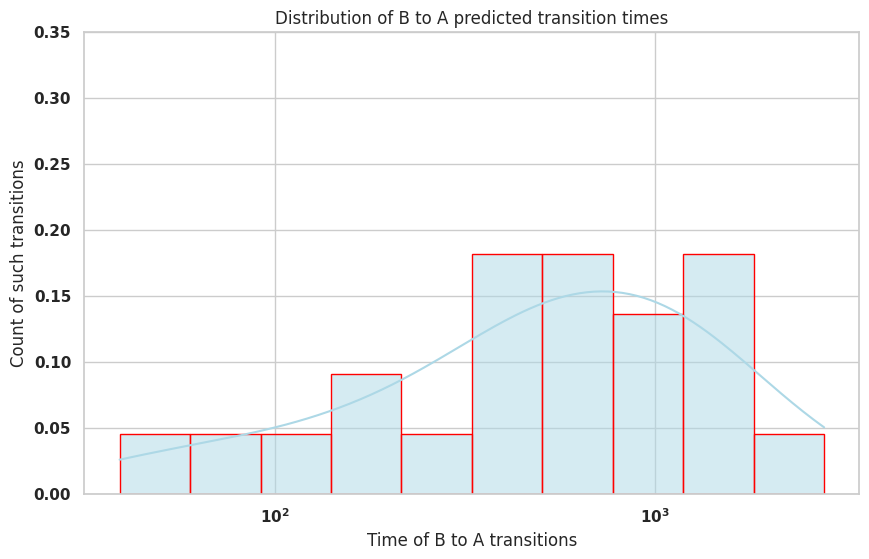

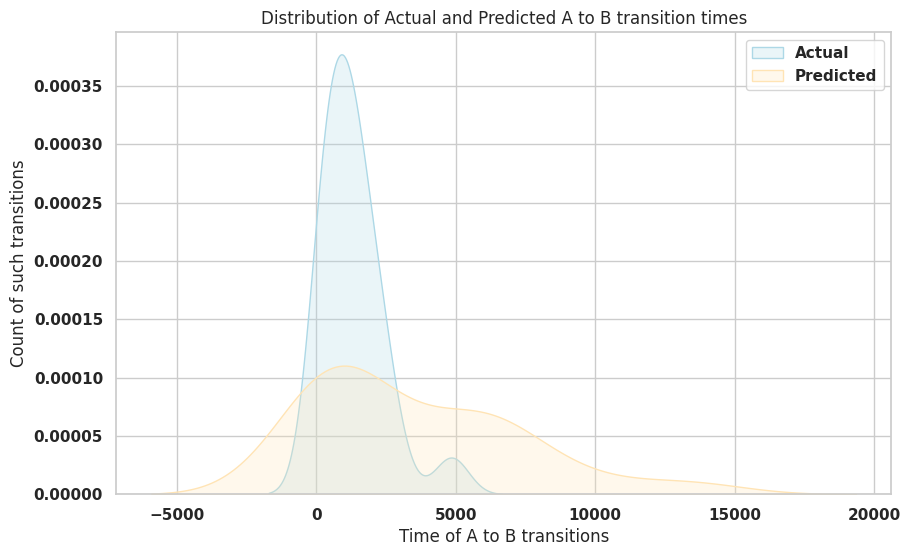

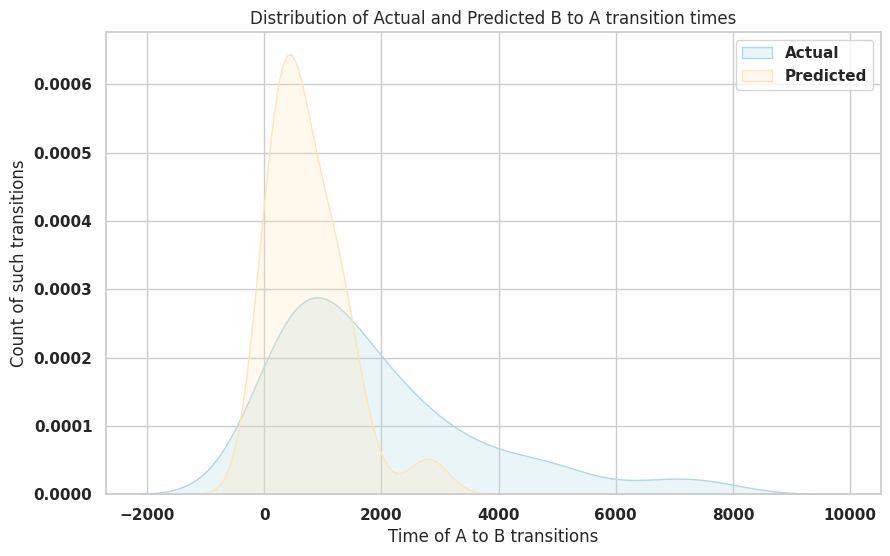